In [1]:
import pandas as pd

In [2]:
files_to_combine = [
    'Data/StreamingHistory_music_0.json',
    'Data/StreamingHistory_music_1.json',
    'Data/StreamingHistory_music_2.json'
]
dataframe_list = []

In [3]:
for i in files_to_combine:
    # Read each JSON file into a pandas DataFrame
    df = pd.read_json(i, orient='records')
    dataframe_list.append(df)
    print(f"Successfully loaded: {i}")

Successfully loaded: Data/StreamingHistory_music_0.json
Successfully loaded: Data/StreamingHistory_music_1.json
Successfully loaded: Data/StreamingHistory_music_2.json


In [4]:
combined_data = pd.concat(dataframe_list, ignore_index=True)
output_filename = 'combined_streaming_dataset.json'
combined_data.to_json(output_filename, orient='records', indent=4)

In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     20899 non-null  object
 1   artistName  20899 non-null  object
 2   trackName   20899 non-null  object
 3   msPlayed    20899 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 653.2+ KB


In [6]:
df = pd.read_json("combined_streaming_dataset.json")
pd.read_json("combined_streaming_dataset.json")

,endTime,artistName,trackName,msPlayed
0,2024-04-22 12:00,Mika Nakashima,KISS OF DEATH（Produced by HYDE）,250200
1,2024-04-22 12:05,sumika,ファンファーレ,279882
2,2024-04-22 12:09,Arijit Singh,Vida Karo,270217
3,2024-04-22 12:10,Mika Nakashima,KISS OF DEATH（Produced by HYDE）,85837
4,2024-04-22 12:10,AmaLee,"Kiss of Death (From ""Darling in the Franxx"")",2175
...,...,...,...,...
20894,2025-04-22 15:59,Lord Huron,The Night We Met,208211
20895,2025-04-22 16:03,yung kai,do you think you could love me?,236140
20896,2025-04-22 17:21,Benson Boone,Before You,187940
20897,2025-04-22 17:26,Cigarettes After Sex,Apocalypse,290146


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     20899 non-null  object
 1   artistName  20899 non-null  object
 2   trackName   20899 non-null  object
 3   msPlayed    20899 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 653.2+ KB


In [8]:
df['endTime'] = pd.to_datetime(df['endTime'])

In [9]:
df['minutesPlayed'] = df['msPlayed'] / 60000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   endTime        20899 non-null  datetime64[ns]
 1   artistName     20899 non-null  object        
 2   trackName      20899 non-null  object        
 3   msPlayed       20899 non-null  int64         
 4   minutesPlayed  20899 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 816.5+ KB


In [11]:
df.drop(columns=["msPlayed"], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20899 entries, 0 to 20898
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   endTime        20899 non-null  datetime64[ns]
 1   artistName     20899 non-null  object        
 2   trackName      20899 non-null  object        
 3   minutesPlayed  20899 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 653.2+ KB


In [13]:
print(df.head())

              endTime      artistName  \
0 2024-04-22 12:00:00  Mika Nakashima   
1 2024-04-22 12:05:00          sumika   
2 2024-04-22 12:09:00    Arijit Singh   
3 2024-04-22 12:10:00  Mika Nakashima   
4 2024-04-22 12:10:00          AmaLee   

                                      trackName  minutesPlayed  
0               KISS OF DEATH（Produced by HYDE）       4.170000  
1                                       ファンファーレ       4.664700  
2                                     Vida Karo       4.503617  
3               KISS OF DEATH（Produced by HYDE）       1.430617  
4  Kiss of Death (From "Darling in the Franxx")       0.036250  


In [14]:
grouped_music_data = df.groupby(['trackName', 'artistName']).agg(totalMinutesPlayed=('minutesPlayed', 'sum'),
                                                              playCount=('trackName', 'count')).reset_index()

In [15]:
grouped_music_data_sorted = grouped_music_data.sort_values(by='totalMinutesPlayed', ascending=False)

In [16]:
print(grouped_music_data_sorted.head(10))

                                              trackName            artistName  \
1022                                     Jo Tum Mere Ho             Anuv Jain   
436                                                 Cry  Cigarettes After Sex   
1165                                Line Without a Hook      Ricky Montgomery   
116                                              Angela           Flower Face   
2332                                               blue              yung kai   
138                                          Apocalypse  Cigarettes After Sex   
2013                                   The Night We Met            Lord Huron   
2036                                     The Wisp Sings            Winter Aid   
1877                                            Sunsetz  Cigarettes After Sex   
1324  Merry-Go-Round of Life - from 'Howl's Moving C...          Joe Hisaishi   

      totalMinutesPlayed  playCount  
1022          672.657450        176  
436           668.818350        

In [17]:
output_filename = 'grouped_music_data_sorted.csv'
grouped_music_data_sorted.to_csv(output_filename, index=False)

In [18]:
grouped_artist_data = df.groupby('artistName').agg(
    # Sum of minutes played for each artist
    totalMinutesPlayed=('minutesPlayed', 'sum'),
    
    # Total number of times any song by the artist was played
    totalPlays=('artistName', 'count'),
    
    # Count of unique tracks listened to for each artist
    uniqueTracksCount=('trackName', 'nunique')
).reset_index()

In [19]:
grouped_artist_data_sorted = grouped_artist_data.sort_values(by='totalMinutesPlayed', ascending=False)

In [20]:
print(grouped_artist_data_sorted.head(10))

                artistName  totalMinutesPlayed  totalPlays  uniqueTracksCount
82               Anuv Jain         2079.102667         624                 14
209   Cigarettes After Sex         1940.511467         550                 28
969        Stephen Sanchez         1112.613800         391                 15
868       Ricky Montgomery         1014.286800         291                  5
823                 Pritam          906.298083         292                 31
923       Satinder Sartaaj          866.024183         172                  4
493           Joe Hisaishi          790.998133         239                 12
1195              yung kai          777.746100         248                  7
143           Benson Boone          698.676633         261                 10
107             Atif Aslam          648.346450         132                 10


In [21]:
output_filename = 'grouped_artist_data_sorted.csv'
grouped_artist_data_sorted.to_csv(output_filename, index=False)

In [22]:
import matplotlib.pyplot as plt

In [23]:
df_artist = pd.read_csv('grouped_artist_data_sorted.csv')

In [24]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artistName          1211 non-null   object 
 1   totalMinutesPlayed  1211 non-null   float64
 2   totalPlays          1211 non-null   int64  
 3   uniqueTracksCount   1211 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 38.0+ KB


In [25]:
top_400 = df_artist.nlargest(400, 'totalMinutesPlayed').sort_values(by='totalMinutesPlayed', ascending=True)

In [26]:
# Bar Chart
plt.figure(figsize=(80, 120))
plt.bar(top_400['artistName'], top_400['totalMinutesPlayed'], color='teal')
plt.xlabel('Artist')
plt.ylabel('Total Minutes played')
plt.title('Top 10 Most Listened-To Artists by Time')
plt.grid()
plt.tight_layout()                                                              # Adjust layout for labels
plt.savefig('artists_bar_chart.png')
plt.xticks([])
plt.show()

/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/1899178049.py:8: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()                                                              # Adjust layout for labels
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/1899178049.py:8: UserWarning: Glyph 30033 (\N{CJK UNIFIED IDEOGRAPH-7551}) missing from font(s) DejaVu Sans.
  plt.tight_layout()                                                              # Adjust layout for labels
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/1899178049.py:8: UserWarning: Glyph 36020 (\N{CJK UNIFIED IDEOGRAPH-8CB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()                                                              # Adjust layout for labels
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/1899178049.py:8: UserWarning: Glyph 35029 (\N{CJK UNIFIED IDEOGRAPH-88D5}) missing fro

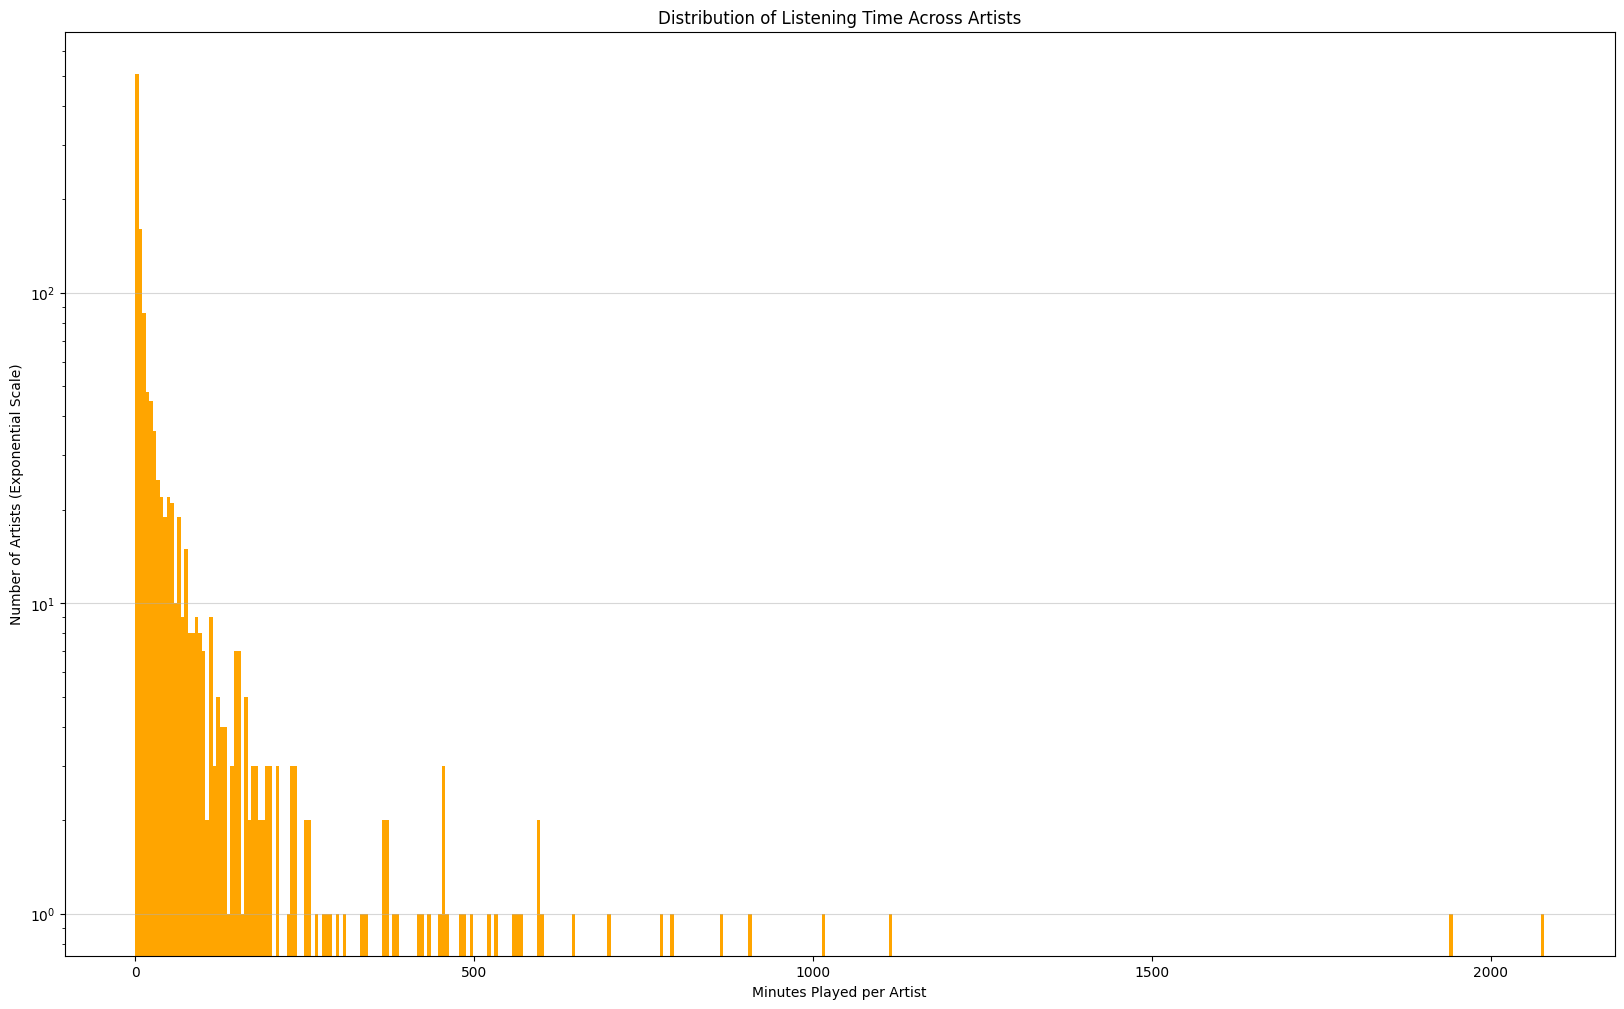

In [27]:
# Histogram
plt.figure(figsize=(20, 12))
plt.hist(df_artist['totalMinutesPlayed'], bins=400, color='orange', log=True)   #log=True to turn the Y scale logarithmic
plt.xlabel('Minutes Played per Artist')
plt.ylabel('Number of Artists (Exponential Scale)')
plt.title('Distribution of Listening Time Across Artists')
plt.grid(axis='y', alpha=0.5)                                                   # alpha is the transparency level for the hz. lines
plt.savefig('artist_histogram.png')
plt.show()

In [28]:
top_75_artists = df_artist.head(75)
print(top_75_artists)

                artistName  totalMinutesPlayed  totalPlays  uniqueTracksCount
0                Anuv Jain         2079.102667         624                 14
1     Cigarettes After Sex         1940.511467         550                 28
2          Stephen Sanchez         1112.613800         391                 15
3         Ricky Montgomery         1014.286800         291                  5
4                   Pritam          906.298083         292                 31
..                     ...                 ...         ...                ...
70                 YOASOBI          176.006200          78                 10
71  Deepak Rathore Project          173.923800          54                  3
72           Lewis Capaldi          173.556450          55                 14
73                    gini          170.109500          90                  4
74           Justin Bieber          168.973383          56                 15

[75 rows x 4 columns]


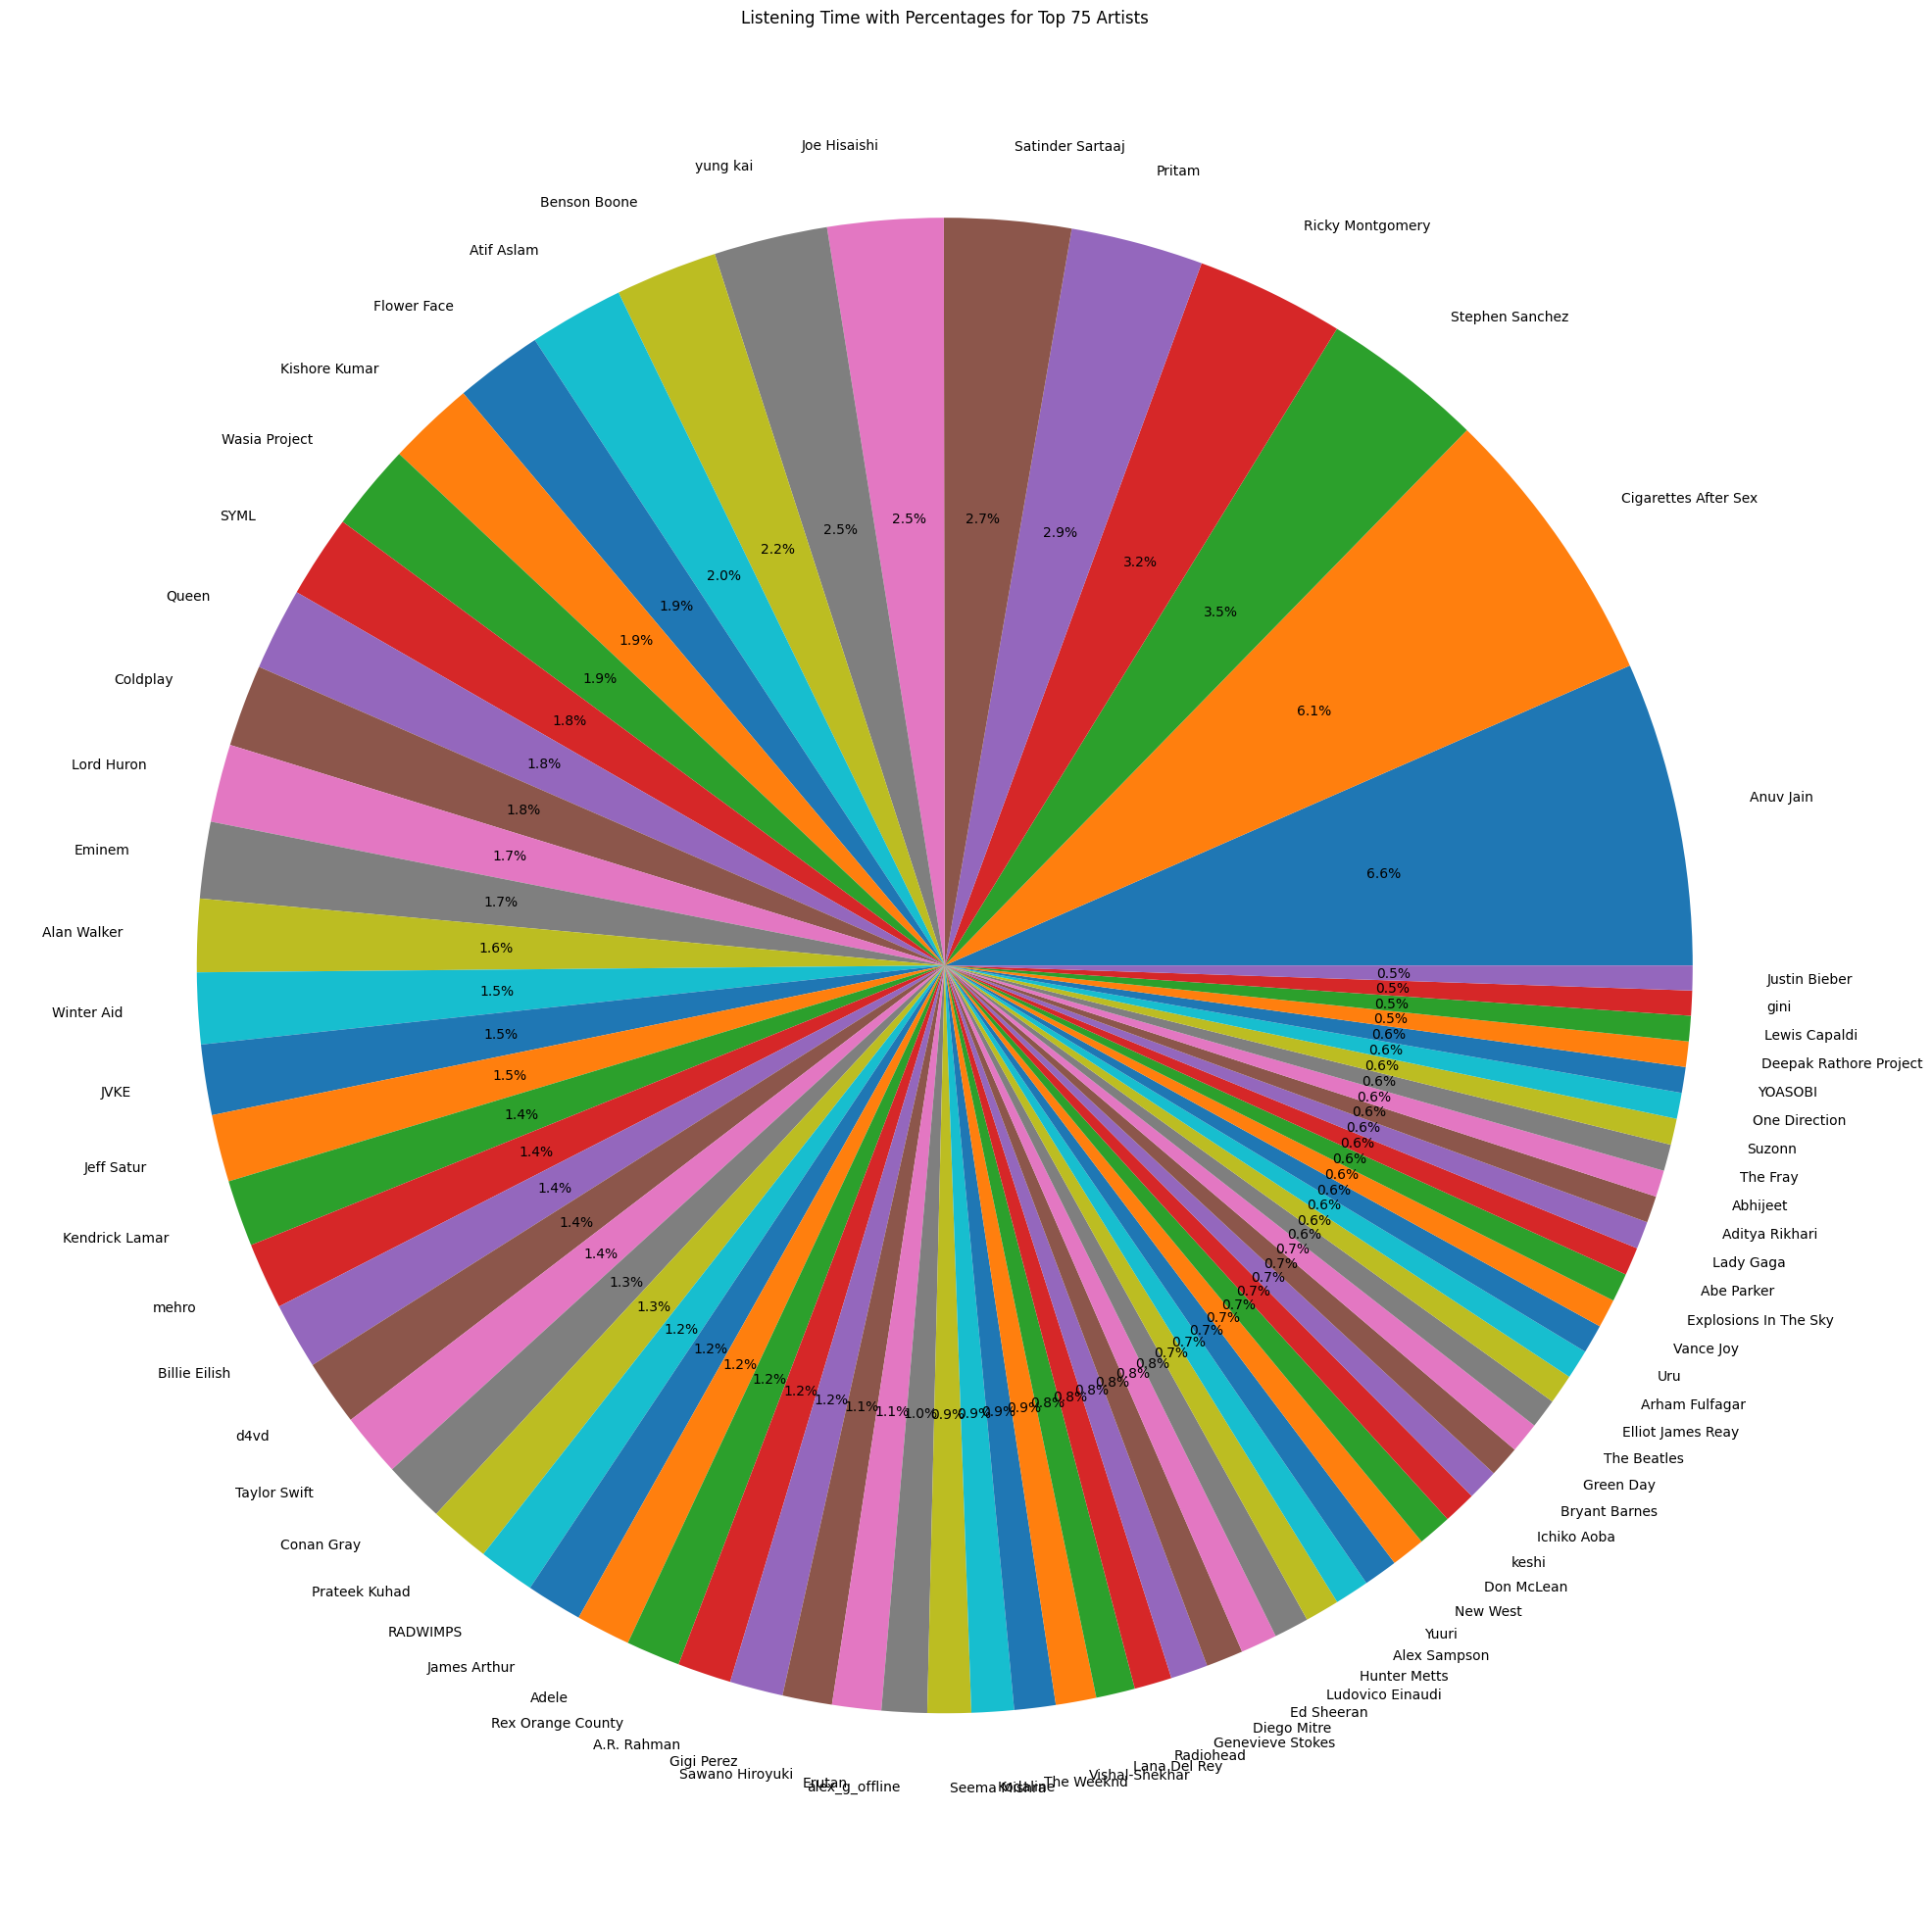

In [29]:
plt.figure(figsize=(20,20))
plt.pie(top_75_artists["totalMinutesPlayed"],
        labels=top_75_artists["artistName"],
        autopct='%1.1f%%')
plt.title('Listening Time with Percentages for Top 75 Artists')
plt.tight_layout()
plt.savefig('top_75_artists_pie_chart.png')
plt.show()

In [30]:
other_artists = df_artist.iloc[75:]
others_summary = pd.DataFrame({
    'artistName': ['Others'],
    'totalMinutesPlayed': [other_artists['totalMinutesPlayed'].sum()],
    'totalPlays': [other_artists['totalPlays'].sum()],
    'uniqueTracksCount' : [other_artists['uniqueTracksCount'].sum()]
})
df_all = pd.concat([top_75_artists, others_summary], ignore_index=True)

In [31]:
print(df_all)

                artistName  totalMinutesPlayed  totalPlays  uniqueTracksCount
0                Anuv Jain         2079.102667         624                 14
1     Cigarettes After Sex         1940.511467         550                 28
2          Stephen Sanchez         1112.613800         391                 15
3         Ricky Montgomery         1014.286800         291                  5
4                   Pritam          906.298083         292                 31
..                     ...                 ...         ...                ...
71  Deepak Rathore Project          173.923800          54                  3
72           Lewis Capaldi          173.556450          55                 14
73                    gini          170.109500          90                  4
74           Justin Bieber          168.973383          56                 15
75                  Others        25186.243467       10627               1893

[76 rows x 4 columns]


In [32]:
songs_df = pd.read_csv("grouped_music_data_sorted.csv")

In [33]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trackName           2525 non-null   object 
 1   artistName          2525 non-null   object 
 2   totalMinutesPlayed  2525 non-null   float64
 3   playCount           2525 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 79.0+ KB


In [34]:
print(songs_df.head(50))

                                            trackName             artistName  \
0                                      Jo Tum Mere Ho              Anuv Jain   
1                                                 Cry   Cigarettes After Sex   
2                                 Line Without a Hook       Ricky Montgomery   
3                                              Angela            Flower Face   
4                                                blue               yung kai   
5                                          Apocalypse   Cigarettes After Sex   
6                                    The Night We Met             Lord Huron   
7                                      The Wisp Sings             Winter Aid   
8                                             Sunsetz   Cigarettes After Sex   
9   Merry-Go-Round of Life - from 'Howl's Moving C...           Joe Hisaishi   
10                         Where's My Love - Acoustic                   SYML   
11                                      

In [35]:
songs_df_top_50 = songs_df.head(50)

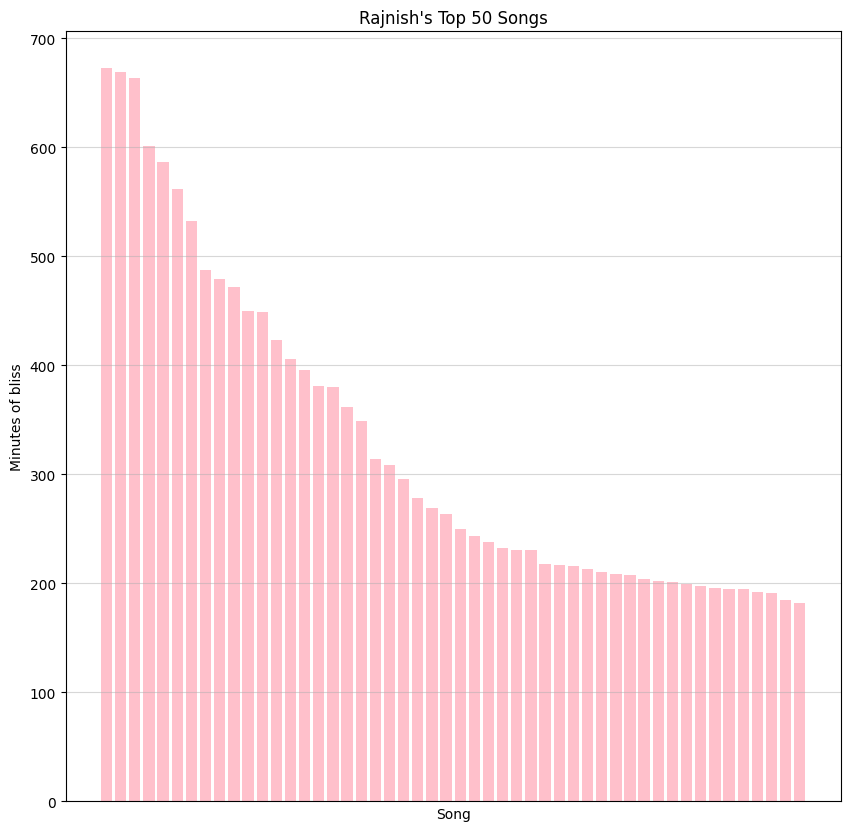

In [36]:
plt.figure(figsize=(10,10))
plt.bar(songs_df_top_50["trackName"],
        songs_df_top_50["totalMinutesPlayed"], color="pink")
plt.xticks([])
plt.xlabel('Song')
plt.ylabel('Minutes of bliss')
plt.title("Rajnish's Top 50 Songs")
plt.grid(axis="y", alpha=0.5)
plt.savefig('top_songs_by_time_bar_chart.png')
plt.show()


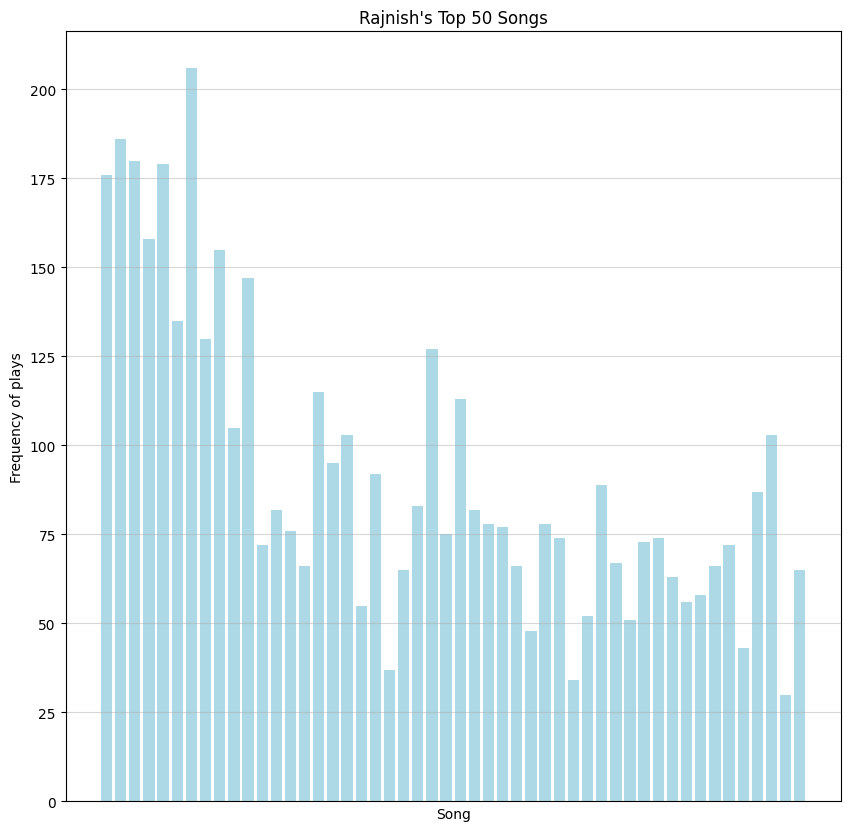

In [37]:
plt.figure(figsize=(10,10))
plt.bar(songs_df_top_50["trackName"],
        songs_df_top_50["playCount"], color="lightblue")
plt.xticks([])
plt.xlabel('Song')
plt.ylabel('Frequency of plays')
plt.title("Rajnish's Top 50 Songs")
plt.grid(axis="y", alpha=0.5)                                                            
plt.savefig('top_songs_by_plays_bar_chart.png')
plt.show()


In [38]:
import numpy as np

/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/2701757792.py:25: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from font(s) DejaVu Sans.
  plt.savefig('dual_axis_songs_chart.png')
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/2701757792.py:25: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.savefig('dual_axis_songs_chart.png')
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/2701757792.py:25: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) DejaVu Sans.
  plt.savefig('dual_axis_songs_chart.png')
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/2701757792.py:25: UserWarning: Glyph 12388 (\N{HIRAGANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.savefig('dual_axis_songs_chart.png')
/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/2701757792.py:25: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from font(s) DejaVu 

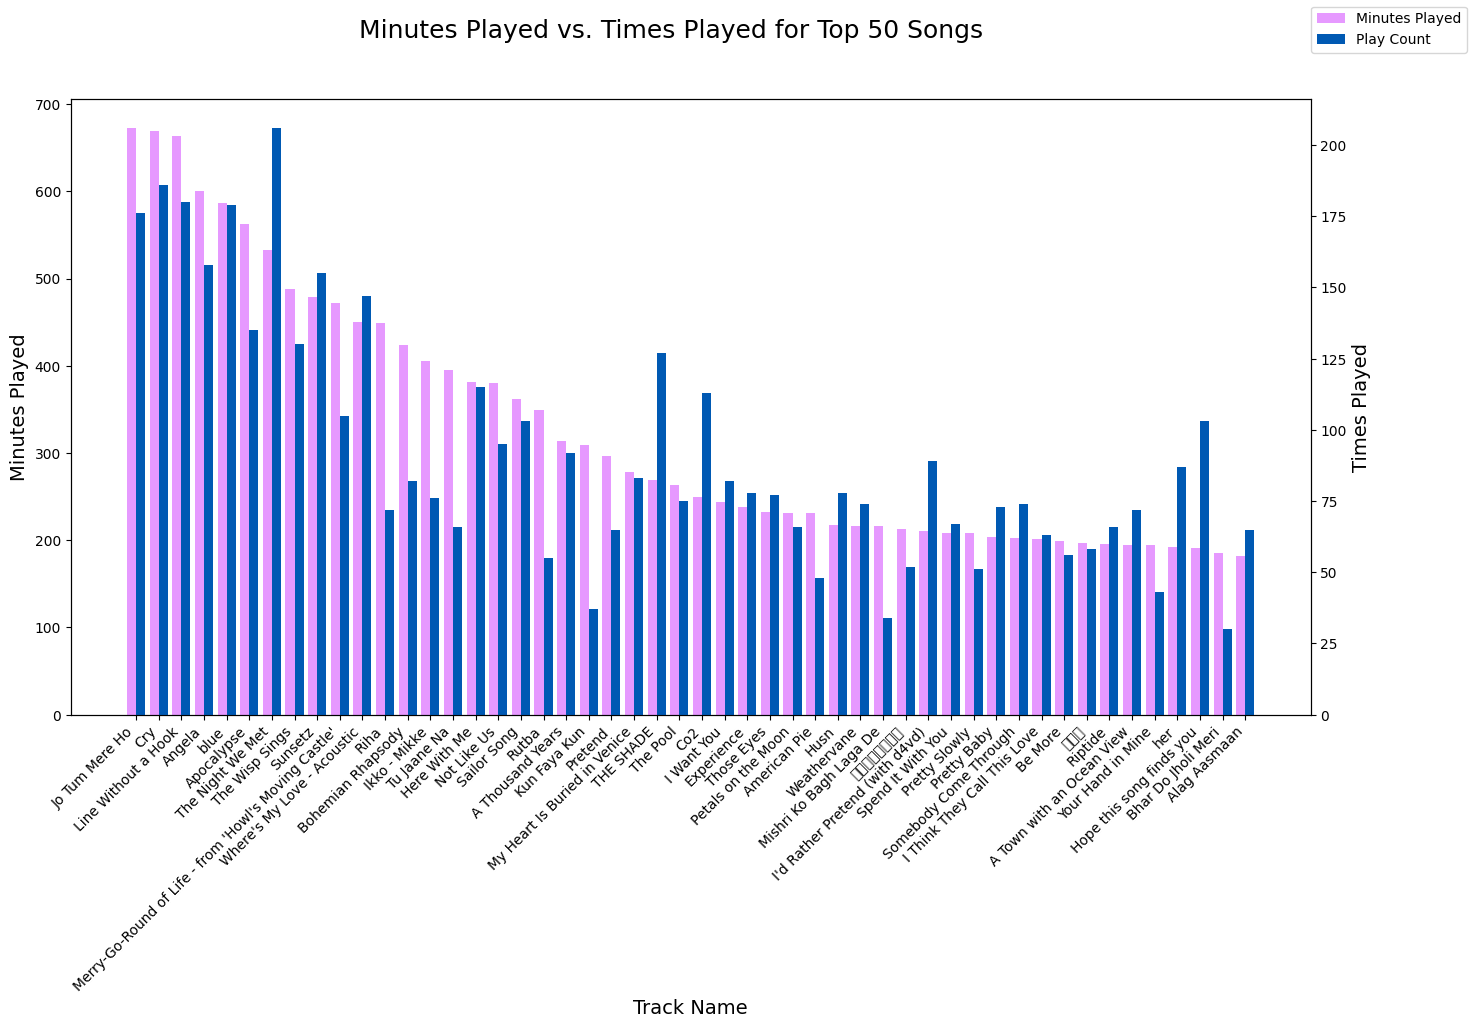

In [39]:
fig, ax1 = plt.subplots(figsize=(16, 8))

bar_width = 0.4
x = np.arange(50)

# Axis 1: Minutes Played
color1 = (230/255, 153/255, 255/255)
ax1.set_xlabel('Track Name', fontsize=14)
ax1.set_ylabel('Minutes Played', fontsize=14)
bar1 = ax1.bar(x - bar_width/2, songs_df_top_50['totalMinutesPlayed'], bar_width, label='Minutes Played', color=color1)
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(songs_df_top_50['trackName'], rotation=45, ha="right")

# Axis 2: Play Count
color2 = (0/255, 89/255, 179/255)
ax2 = ax1.twinx()
ax2.set_ylabel('Times Played', fontsize=14)
bar2 = ax2.bar(x + bar_width/2, songs_df_top_50['playCount'], bar_width, label='Play Count', color=color2)
ax2.tick_params(axis='y')

# Final Touches
fig.suptitle(f'Minutes Played vs. Times Played for Top 50 Songs', fontsize=18)
fig.legend(loc="upper right") # Add a single legend
plt.savefig('dual_axis_songs_chart.png')
plt.show()

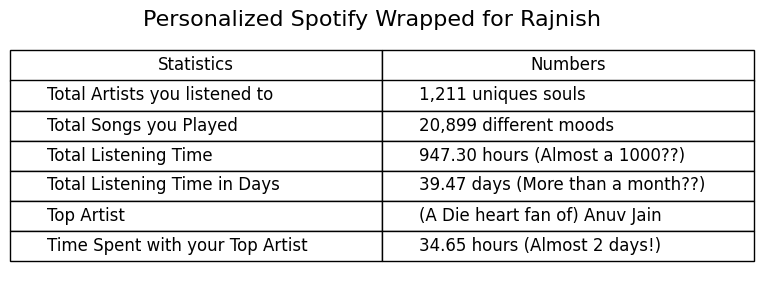

In [ ]:
total_artists = len(df_artist)
total_plays = df_artist['totalPlays'].sum()
total_hours = df_artist['totalMinutesPlayed'].sum()/60
total_days = total_hours/24

top_artist = df_artist.iloc[0]
top_artist_name = top_artist['artistName']
top_artist_hours = top_artist['totalMinutesPlayed']/60


stats_data = [
    ['Total Artists you listened to', f'{total_artists:,} uniques souls'],
    ['Total Songs you Played', f'{total_plays:,} different moods'],
    ['Total Listening Time', f'{total_hours:,.2f} hours (Almost a 1000??)'],
    ['Total Listening Time in Days', f'{total_days:,.2f} days (More than a month??)'],
    ['Top Artist', f'(A Die heart fan of) {top_artist_name}'],
    ['Time Spent with your Top Artist', f'{top_artist_hours:,.2f} hours (Almost 2 days!)']
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

table = ax.table(
    cellText=stats_data,
    colLabels=['Statistics', 'Numbers'],
    loc='center',
    cellLoc='left'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)

fig.suptitle('Personalized Spotify Wrapped for Rajnish', fontsize=16)
plt.savefig('Spotify_wrapped_table.png')
plt.show()

/var/folders/nt/kphpsq1j1lqgb7jbdntdrbym0000gn/T/ipykernel_30111/3215496850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['totalMinutesPlayed'] = df_top_10['totalMinutesPlayed'].map('{:,.0f}'.format)


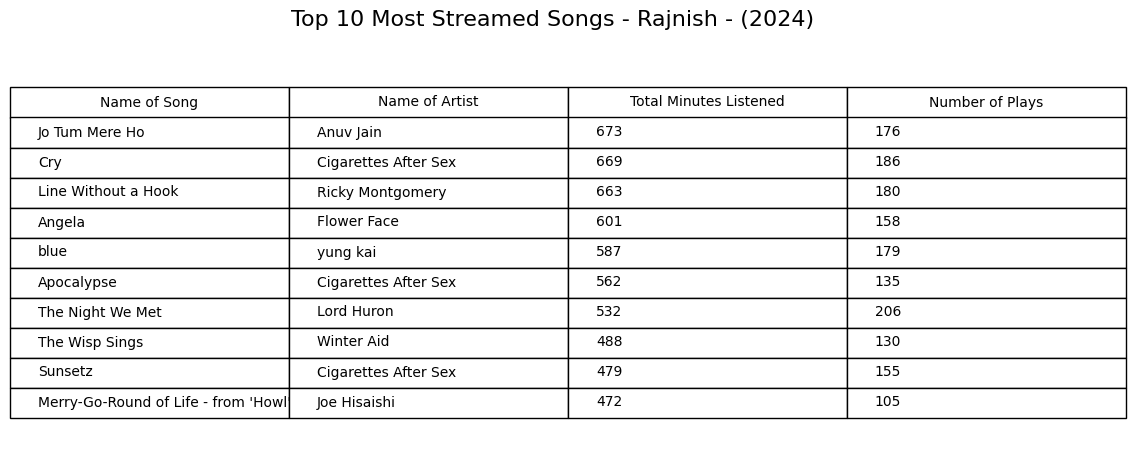

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df_top_10 = songs_df.head(10)
df_top_10['totalMinutesPlayed'] = df_top_10['totalMinutesPlayed'].map('{:,.0f}'.format)

table_data = df_top_10[['trackName', 'artistName', 'totalMinutesPlayed', 'playCount']]
table_data.columns = ['Name of Song', 'Name of Artist', 'Total Minutes Listened', 'Number of Plays']

fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')

table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='left'
)

table.auto_set_font_size(False)
table.set_fontsize(10) 
table.scale(1.2, 1.8)

fig.suptitle('Top 10 Most Streamed Songs - Rajnish - (2024)', fontsize=16)
plt.savefig('top_10_songs_table.png')
plt.show()